In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel("C:\\Users\\HomePC\\Downloads\\customer_data.xlsx")

# Display the first few rows of the dataset
df.head()


,CustomerID,Age,AnnualIncome,SpendingScore
0,1001,55,66175.97,24.42
1,1002,49,31599.08,89.89
2,1003,69,58510.52,64.85
3,1004,42,45646.97,62.84
4,1005,30,56914.69,57.22


In [6]:
# Check the structure of the dataset
df.info()

# Summary statistics of numerical features
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     500 non-null    int64  
 1   Age            500 non-null    int64  
 2   AnnualIncome   500 non-null    float64
 3   SpendingScore  500 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

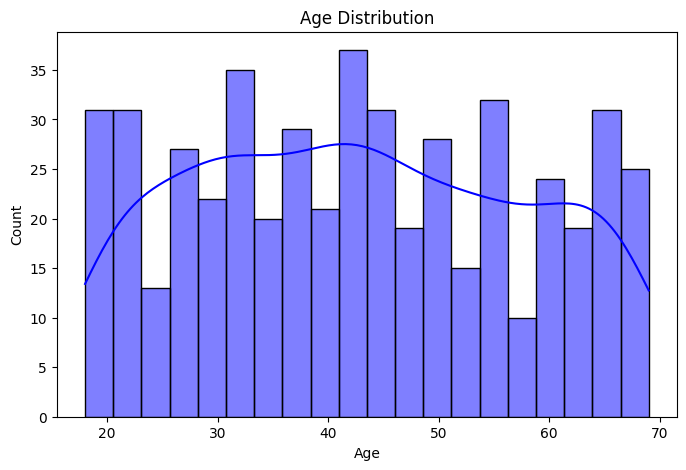

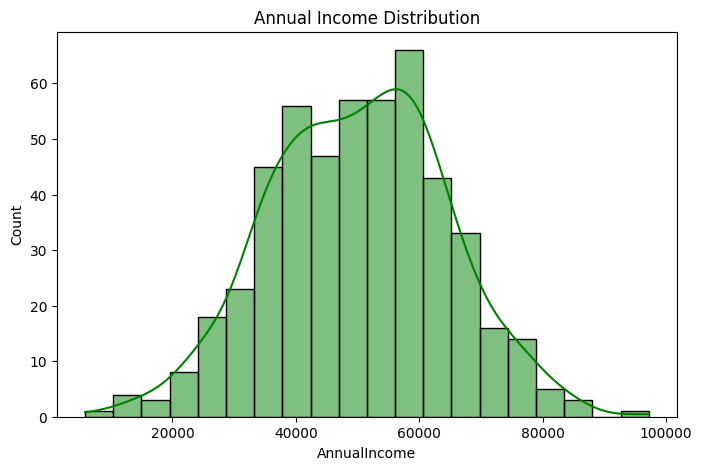

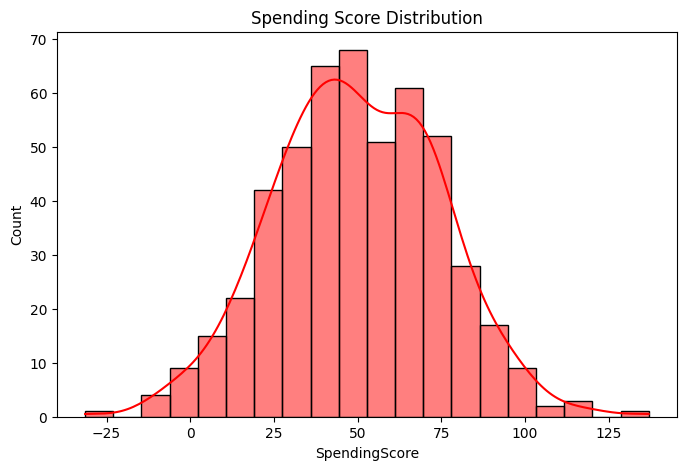

In [7]:
# Plot the distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

# Plot the distribution of Annual Income
plt.figure(figsize=(8, 5))
sns.histplot(df['AnnualIncome'], bins=20, kde=True, color='green')
plt.title("Annual Income Distribution")
plt.show()

# Plot the distribution of Spending Score
plt.figure(figsize=(8, 5))
sns.histplot(df['SpendingScore'], bins=20, kde=True, color='red')
plt.title("Spending Score Distribution")
plt.show()


In [8]:
# Select features for clustering
features = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Check the first few rows of scaled data
scaled_features[:5]


array([[ 0.82565305,  1.12574246, -1.03457501],
       [ 0.41799025, -1.29742648,  1.61794249],
       [ 1.77686623,  0.58854318,  0.60344672],
       [-0.05761634, -0.31294202,  0.52201155],
       [-0.87294193,  0.47670647,  0.29431722]])

In [9]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Show the first few rows with cluster labels
df.head()


,CustomerID,Age,AnnualIncome,SpendingScore,Cluster
0,1001,55,66175.97,24.42,1
1,1002,49,31599.08,89.89,3
2,1003,69,58510.52,64.85,3
3,1004,42,45646.97,62.84,3
4,1005,30,56914.69,57.22,0


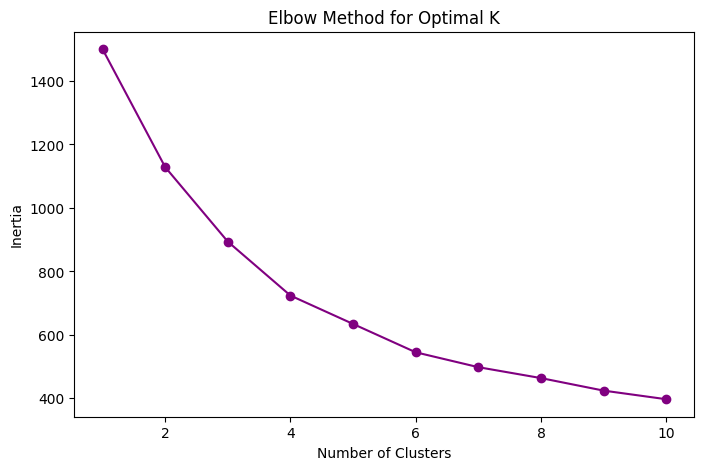

In [10]:
# Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color='purple')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()
